# Evaluation terminale : Machine learning & python -- Martineau Swann

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le machine learning sert à décrire les processus d'une intelligence artificielle ou purement algorithmique de l'apprentissage de cette IA.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Il y a par exemple TikTok avec son algorithme de propositions de vidéos selon ce que l'utilisateur regarde comme vidéos, le temps qu'il passe sur la vidéo si il a commenté ou bien liké par exemple. L'IA va apprendre de plus en plus à reconnaître et percevoir les goûts de l'utilisateur et lui proposer un meilleur contenu.
Dans le domaine du médical, les données sont analysées pour permettre au corps médical d'établir des stats, les interpréter et ainsi pouvoir proposer les meilleures solutions.

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Il y a 2 familles : l'apprentissage supervisé et l'apprentissage non supervisé.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Le clustering appartient à la famille d'apprentissage non supervisée et la classification à l'apprentissage supervisée

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

L'arbre de décision permet de faire une prédiction ou un classement des données. L'arbre de décision est un schéma sous forme d'arbre qui montre les différentes données en fonction de leurs probabilités.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

On parle d'overfitting dans un cas de sur-apprentissage de l'intelligence artificielle, il sortira des résultats non désirés dans ce cas car trop précis, il n'arrivera pas à faire une généralisation.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [49]:
# packages
import pandas as pd
#...
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



Importez les données comme suit :

In [50]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [51]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

On doit enlever le nom des joueurs car il est propre à chaque joueur et ne sert pas pour l'analyse des données c'est un string et non des int.

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [52]:
data.drop(columns=['Name'],axis=1, inplace=True)
data.drop(columns=['3P%'],axis=1, inplace=True)

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Oui le dataset contient une colonne dont les données ne sont pas exploitables, le 3P% car il y a des pourcentages = 0

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [53]:
# code..

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [54]:
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Cette étape est indispensable car elle permet d'évaluer l'efficacité de l'algorithme du machine learning.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [55]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

estimate = clf.predict_proba(X_test)[:,1]

true = Y_test

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [56]:
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.5827907328891581


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

On utilise le ROC (receiving operating characteristic) car il permet de classifier si un joueur est bon ou non.

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Non car un AUC inférieur à 0,6 n'est pas assez satisfaisant, l'AUC doit au moins être supérieur à O,6

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

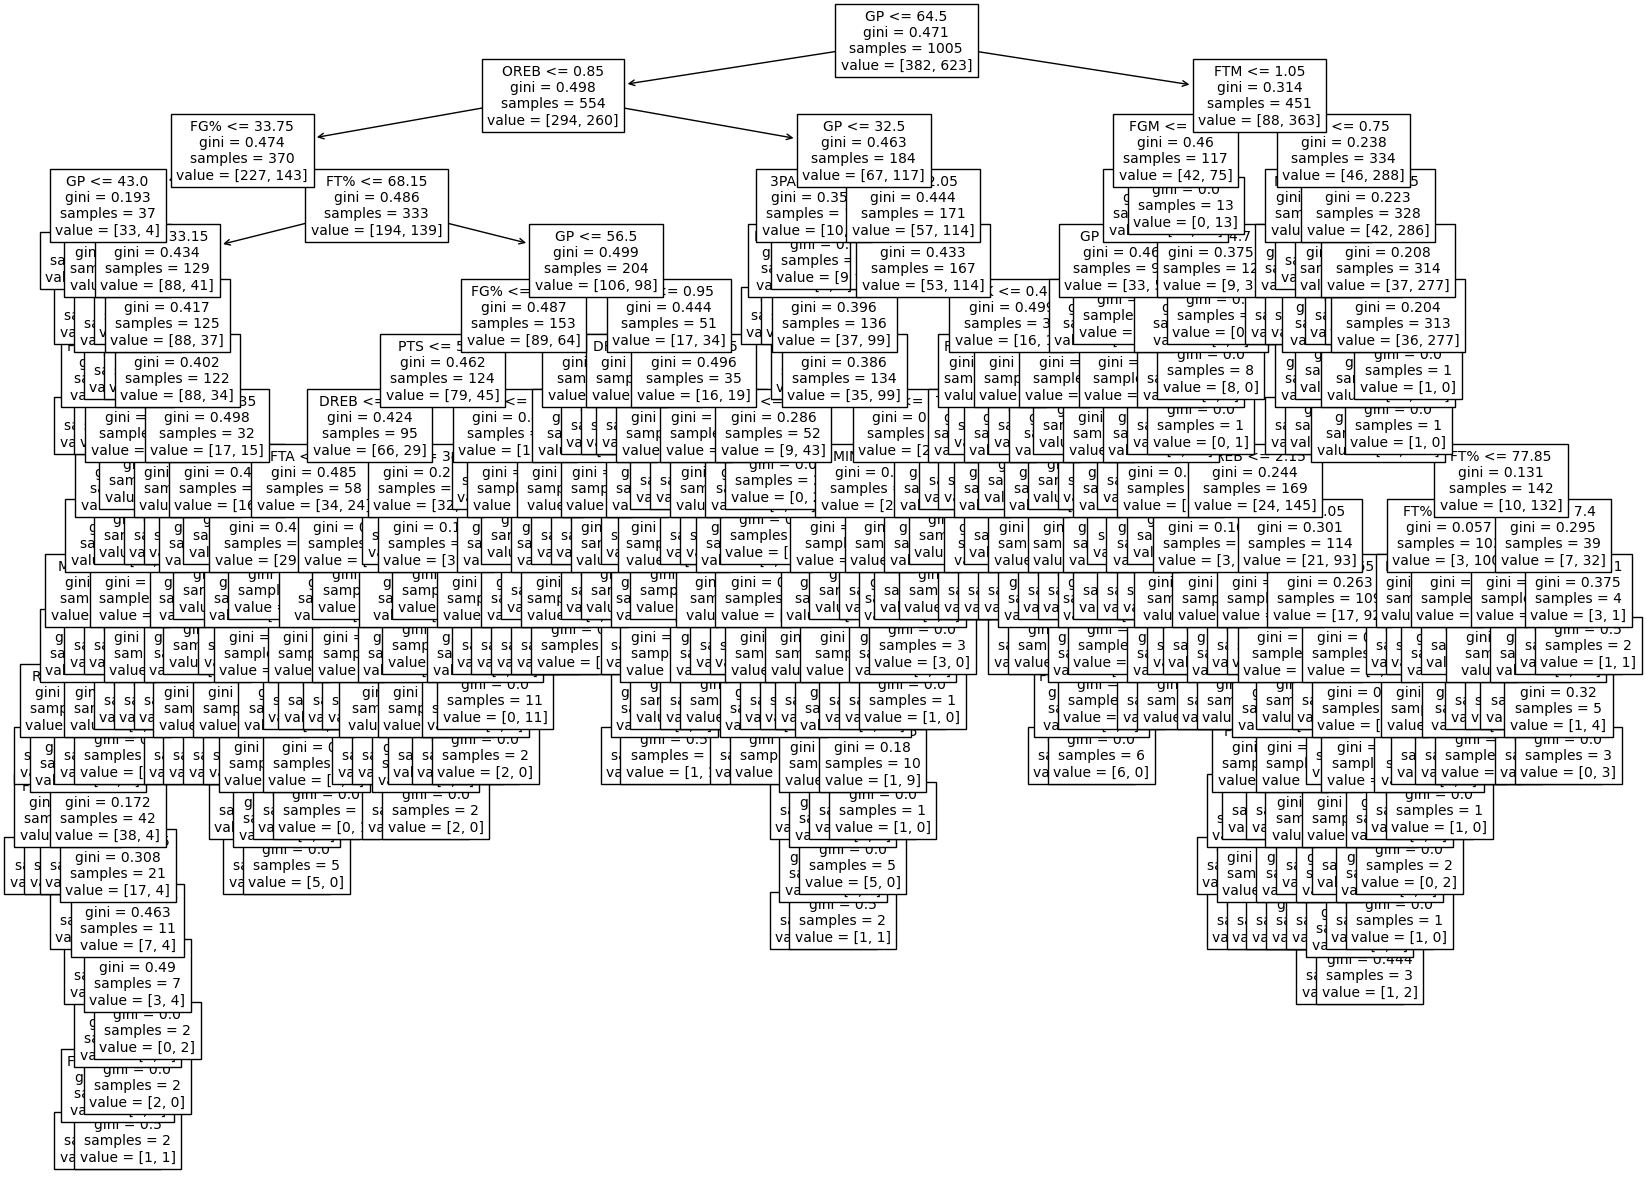

In [61]:
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Je ne sais pas répondre à cette question

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

On peut utiliser la méthode du RandomizedSearch, changer les hyperparamètres(gridsearch) ou le RandomForestClassifier

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [59]:
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

clf_grid = DecisionTreeClassifier()

grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=8)
grid_search_tree.fit(X, Y.values)

best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01, 'random_state': 42}
best auc: 0.7062433475391416


#### Question 2.8: Concluez

On peut obtenir un résultat acceptable d'environ 0,7 grâce au gridsearch